### Refer Data Structures notebook for the first part.<br>
It also includes the theory of Graphs. This notebook is starting with continuation of graph concept.

# <u>Spanning Tree and Minimum Spanning Tree</u>

There are 2 types of graph:<br>
1) undirected graph<br>
2) connected graph<br>


A undirected graph is a graph in which the edges do not point at any direction i.e the edges are bidirectional.<br>
A connected graph is a graph in which there is always a path from a vertex to any other vertex.

## Spanning Tree
A spanning tree is a sub-graph of a undirected connected graph, which includes all the vertices of the graph with minimum possible number of edges. If a vertex is missed then it is not a spanning tree.<br><br>
The total number of spanning trees with "<b>n</b>" vertices that can be created from a graph is equal to <b>n^(n-2)</b>

Link for further example of Spanning tree https://www.programiz.com/dsa/spanning-tree-and-minimum-spanning-tree

# <u>Adjacency Matrix</u>

An adjacency matrix is a way of representing a graph G = {V, E} as a matrix of booleans<br>
The size of a martix is VxV, where V is the number of vertices in the graph. The value of an entry Aij is either 0 or 1 depending whether there is an edge from vertex i to vertex j.<br>
<br>
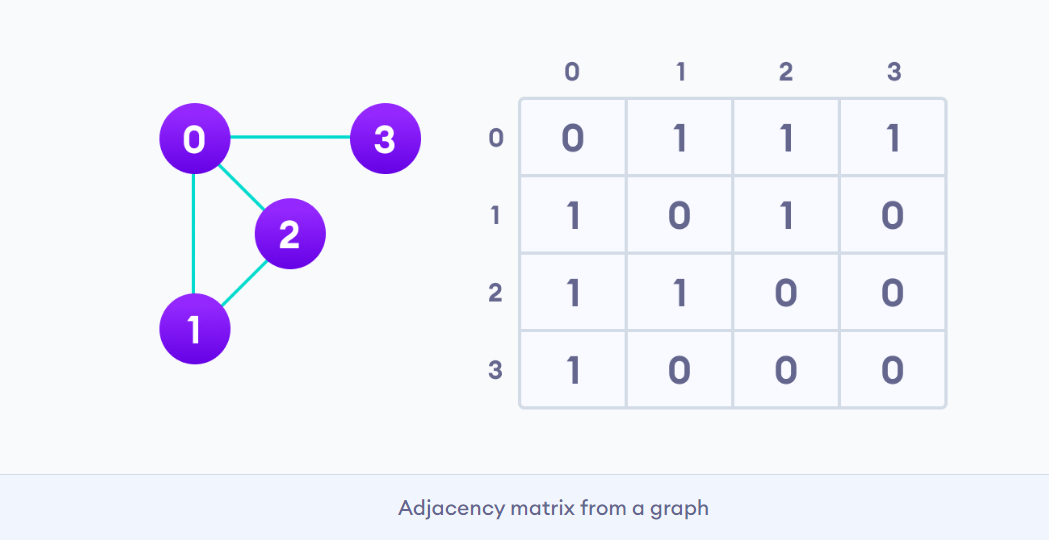
In case of undirected graph the matrix is symmetric along the diagonal.<br>

## Pros of Adjacency Matrix
The basic operations like adding an edge, removing an edge and checking whether there is an edge from vertex 1 to vertex 2 is extremely time efficient, constant time operations.<br>
If graph is <b>dense</b> and number of <b>edges is large</b> then the Adjacency matrix should first choice.<br>
The biggest advantages comes with the use of matrices. The recent advances in the hardware allows us to do expensive operations on the GPU.
<br>
<br>
## Cons of Adjaceny Martix
The VxV space requirement of the matrix makes it a memory hog. 

## Applications
1) Creating routing tables in networks<br>
2) Navigation tasks

In [5]:
# Adjacency Matrix

class Graph(object):
    #Initialise the matrix
    def __init__(self, size):
        self.adjMatrix = []
        for i in range(size):
            self.adjMatrix.append([0 for i in range(size)])
        self.size = size
    
    #Add edges
    def add_edge(self, v1, v2):
        if v1 == v2:
            print("Same vertex %d and %d" % (v1, v2))
        self.adjMatrix[v1][v2] = 1
        self.adjMatrix[v2][v1] = 1
        
    #Remove Edges
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between %d and %d" % (v1, v2))
            return
        self.adjMatrix[v1][v2] = 0
        self.adjMatrix[v2][v1] = 0
        
    def __len__(self):
        return self.size
    
    #Print the matrix
    def print_matrix(self):
        for row in self.adjMatrix:
            for val in row:
                print(val)

            
    

def main():
    g = Graph(5)
    g.add_edge(0, 1)
    g.add_edge(0, 2)
    g.add_edge(1, 2)
    g.add_edge(2, 0)
    g.add_edge(2, 3)
    
    g.print_matrix()
    
if __name__ == '__main__':
    main()

0
1
1
0
0
1
0
1
0
0
1
1
0
1
0
0
0
1
0
0
0
0
0
0
0


# <u>Adjacency List</u>
An adjacency list represents a graph as an array of linked lists.<br>
The index of the array represents a vertex and each element in its linked list represents the other vertices the form an edge with the vertex.<br>
<br>
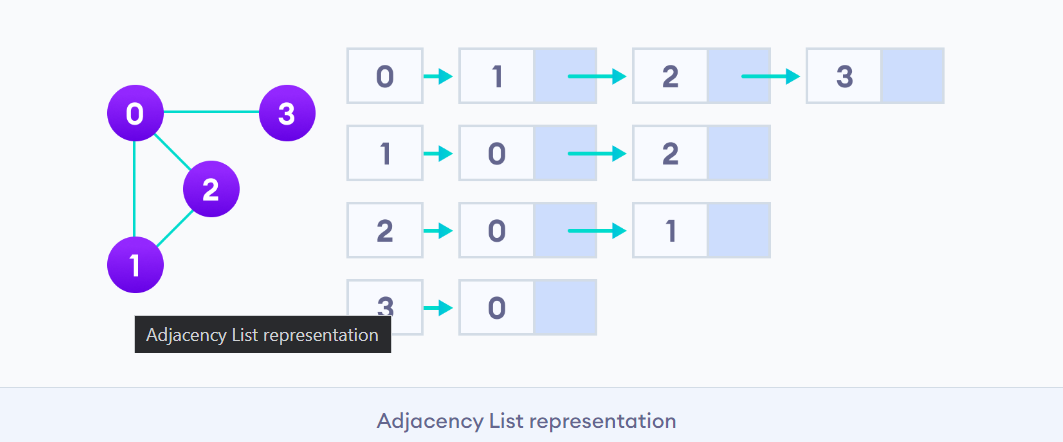
An adjacency list is efficient in terms of space, storage because we only need to store the values for the edges. For a sparsed graph with millions of vertices it can mean a lot of space saved.<br>
<br>
## Adjacency List Structure
The simplest adjacency list needs a node data structure to store a vertex and a graph data structure to organise the nodes.<br>
For python, a simple dictionary of vertices and edges is a sufficient representation of a graph. We can make the vertex itself as complicated as we want.
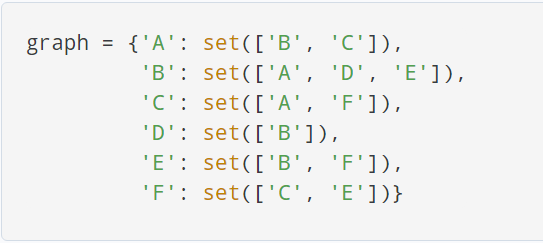

In [3]:
# Adjacency List representation 
class AdjNode:
    def __init__(self, vertex):
        self.vertex = vertex
        self.next = None

class Graph:
    def __init__(self, num):
        self.V = num
        self.graph = [None] * self.V
        
    #Add edges
    def add_edge(self, s, d):
        node = AdjNode(d)
        node.next = self.graph[s]
        self.graph[s] = node
        
        node = AdjNode(s)
        node.next = self.graph[d]
        self.graph[d] = node
        
    #Print the graph
    def print_graph(self):
        for i in range(self.V):
            print("Vertex "+str(i)+" :", end=" ")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print('\n')
            
if __name__ == "__main__":
    V = 5

    # Create graph and edges
    graph = Graph(V)
    graph.add_edge(0, 1)
    graph.add_edge(0, 2)
    graph.add_edge(0, 3)
    graph.add_edge(1, 2)

    graph.print_graph()

Vertex 0 :  -> 3 -> 2 -> 1

Vertex 1 :  -> 2 -> 0

Vertex 2 :  -> 1 -> 0

Vertex 3 :  -> 0

Vertex 4 : 



# <u>Depth First Search (DFS)</u>
Depth First Search or the Depth First Traversal is a <b>recursive algorithm</b> for searching all the vertices of a graph or a tree data structure. Treversal means visiting all the nodes of a graph.<br>
A standard DFS implementation puts each vertex of the graph into one of the two categories:<br>
1) Visited<br>
2) Not Visited<br>
<br>
The purpose of this algorithm is to mark each vertex as visited while avoiding cycles. <br>
The DFS algorithm works as follows:<br>
1) Start by putting any one of the vertices on the top of a stack.<br>
2) Take the top item of the stack and add them to the visited list.<br>
3) Create a list of that node's adjacent nodes. Add the ones which aren't in the visited list to the top of the stack.<br>
4) Keep repeating steps 2 and 3 until the stack is empty.<br>
<br>
<b>Use this link to see the examples of DFS:</b> https://www.programiz.com/dsa/graph-dfs<br>
<br>
We run the DFS function on every node. This is because the graph might have 2 different disconnected parts so to make sure that we conver every vertex, we run DFS algorithm on every node.


In [4]:
#DFS algorithm in python
#DFS algo

def dfs(graph, start, visited = None):
    if visited == None:
        visited = set()
    visited.add(start)
    print(start)
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

graph = {'0': set(['1', '2']),
         '1': set(['0', '3', '4']),
         '2': set(['0']),
         '3': set(['1']),
         '4': set(['2', '3'])}
dfs(graph, '0')

0
1
4
2
3
3
2


{'0', '1', '2', '3', '4'}

## Complexity of DFS
The <b>time complexity</b> of the DFS algorithm is represented in the form of <b>O(V + E)</b>, where V is the number of nodes and E is the number of edges.<br>

The <b>space complexity</b> of the algorithm is <b>O(V)</b>.
<br>
## Application of DFS Algorithm
1) For finding the path<br>
2) To test if the graph is bipartite<br>
3) For finding the strongly connected components<br>
4) For detecting cycles in graph<br>

# <u>Breadth First Search (BFS) Algorithm</u>
A standard BFS implementation puts each vertex of the graph into one of two categories:<br>

1) Visited<br>
2) Not Visited<br>
The purpose of the algorithm is to mark each vertex as visited while avoiding cycles.<br>
<br>
The algorith works as follows:<br>
1) Start by putting any one of the graphs vertices at the back of a queue.<br>
2) take the front item of a queue and add it to the visited list.<br>
3) Create a list of that vertex's adjacent nodes. Add the ones which aren't in the visited list to the back of the queue.<br>
4) Keep repeating steps 2 and 3 until the queue is empty.<br><br>

We can also run BFS algorithm on every node.<br>
<b>Use this link for BFS example:</b> https://www.programiz.com/dsa/graph-bfs<br>


In [1]:
import collections

def bfs(graph, root):
    visited, queue = set(), collections.deque([root])
    visited.add(root)
    
    while queue:
        #Dequeue a vertex from the queue
        vertex = queue.popleft()
        print(str(vertex) + " ", end="")
        #if not visited, mark it as visited and enqueue it
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)

if __name__ == '__main__':
    graph = {
        0: [1,2],
        1: [2],
        2: [3],
        3: [1,2]
    }
    print("The follwing is the breadth first traversal")
    bfs(graph, 0)

The follwing is the breadth first traversal
0 1 2 3 

## BFS Algorithm Complexity
The <b>time complexity</b> of the BFS algorithm is represented in the form of <b>O(V + E)</b> where V is the number of nodes and E is the number of edges.<br>
The <b>space complexity</b> is <b>O(V)</b><br>

## BFS Algorithm Applications
1) To build the index by search index<br>
2) For GPS navigation<br>
3) Path finding applications<br>
4) In Ford-Fulkerson algorithm to find the maximum flow in a network.<br>
5) Cycle detection in Undirected graph<br>
6) In minimum spanning tree.